# Métodos de Monte Carlo

Juan Sosa PhD

Email: jcsosam@unal.edu.co

GitHub: https://github.com/jstats1702

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import nbinom
from tabulate import tabulate

# Métodos de Monte Carlo

Los **métodos de Monte Carlo** son algoritmos que emplean **muestreo aleatorio** para obtener **aproximaciones numéricas** a problemas complejos.

El principio fundamental es aprovechar la aleatoriedad para **abordar problemas** tanto **estocásticos** (generación de muestras de una distribución de probabilidad), como **determinísticos** (optimización e integración numérica).

El término "Monte Carlo" fue acuñado por **Stanislaw Ulam** y **Nicholas Metropolis** en referencia al famoso casino de Monte Carlo en Mónaco, debido a la asociación con la aleatoriedad característica de los juegos de azar.

**Cualquier distribución de probabilidad**, y por extensión cualquier propiedad asociada a ella, puede ser **aproximada con precisión arbitraria** mediante un número suficientemente grande de **muestras aleatorias**, ajustado según el nivel de exactitud requerido.

# Implementación

Sea $\theta$ un parámetro de interés y $\boldsymbol{y} = (y_1, \dots, y_n)$ un conjunto de observaciones. 

Suponga que se puede obtener una muestra aleatoria de tamaño $B$ a partir de la **distribución posterior** de $\theta$:
$$
\theta^{(1)}, \dots, \theta^{(B)} \overset{\text{iid}}{\sim} p(\theta \mid \boldsymbol{y})\,.
$$

La **distribución empírica** de los valores muestrales $\theta^{(1)}, \dots, \theta^{(B)}$ proporciona una **aproximación** a la **distribución posterior** de $\theta$, cuya precisión mejora a medida que **aumenta** el valor de $B$.

## Ley débil de los grandes números

**(Ley débil de los grandes números.)** Sea $X_1,\ldots,X_n$ una secuencia de variables aleatorias independientes e idénticamente distribuidas con media $\mu$ y varianza finita $\sigma^2$. Entonces, el promedio muestral $\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i$ **converge en probabilidad** a $\mu$ cuando $n\rightarrow\infty$, i.e., para todo $\epsilon > 0$ se tiene que
$$
\lim\limits_{n\to\infty}\textsf{Pr}(|\bar{X}_n - \mu| < \epsilon) = 1\,.
$$

La **ley débil de los grandes números** garantiza que:
$$
\frac{1}{B}\sum_{b=1}^{B} g(\theta^{(b)})\longrightarrow \textsf{E}(g(\theta)\mid \boldsymbol{y}) = \int_\Theta g(\theta)\,p(\theta\mid \boldsymbol{y})\,\text{d}\theta\,,
$$
cuando $B\rightarrow\infty$, con $g(\theta)$ una función arbitraria de $\theta$. 

- **Media** posterior: 
$$
\frac{1}{B}\sum_{b=1}^{B}\theta^{(b)}\longrightarrow\textsf{E}(\theta\mid \boldsymbol{y}) = \int_\Theta \theta\,p(\theta\mid\boldsymbol{y})\,\text{d}\theta\,.
$$
- **Varianza** posterior:
$$
\frac{1}{B}\sum_{b=1}^{B}(\theta^{(b)} - \bar{\theta})^2\longrightarrow\textsf{Var}(\theta\mid \boldsymbol{y}) = \textsf{E}\left((\theta-\textsf{E}(\theta\mid\boldsymbol{y}))^2\mid\boldsymbol{y}\right) = \int_\Theta \left(\theta - \textsf{E}(\theta\mid\boldsymbol{y})\right)^2\,p(\theta\mid\boldsymbol{y})\,\text{d}\theta\,.
$$
- **Probabilidad** posterior:
$$
\frac{1}{B}\sum_{b=1}^{B}I( \theta^{(b)}\in A )\longrightarrow\textsf{Pr}(\theta\in A\mid \boldsymbol{y}) = \textsf{E}\left(I ( \theta\in A ) \mid \boldsymbol{y} \right) = \int_\Theta I( \theta\in A )\,p(\theta\mid\boldsymbol{y})\,\text{d}\theta\,.
$$
- **Distribución empírica** posterior:
$$
\frac{1}{B} \sum_{b=1}^B I(\theta^{(b)} \le t) \longrightarrow F_{\theta\mid\boldsymbol{y}}(t) = \textsf{E}(I(\theta \le t)\mid\boldsymbol{y}) = \int_\Theta I( \theta < t )\,p(\theta\mid\boldsymbol{y})\,\text{d}\theta\,.
$$

#### Ejemplo

Aproximación de la distribución Gamma con parámetros $\alpha=3$ y $\beta=2$.

In [5]:
# Parámetros de la distribución Gamma
a = 3  # shape
b = 2  # rate
scale = 1 / b  # scale = 1 / rate

# Tamaños de muestra
m = [10, 30, 1000]

# Semilla para reproducibilidad
np.random.seed(123)

# Simulación
theta_mc_1 = gamma.rvs(a, scale=scale, size=m[0])
theta_mc_2 = gamma.rvs(a, scale=scale, size=m[1])
theta_mc_3 = gamma.rvs(a, scale=scale, size=m[2])

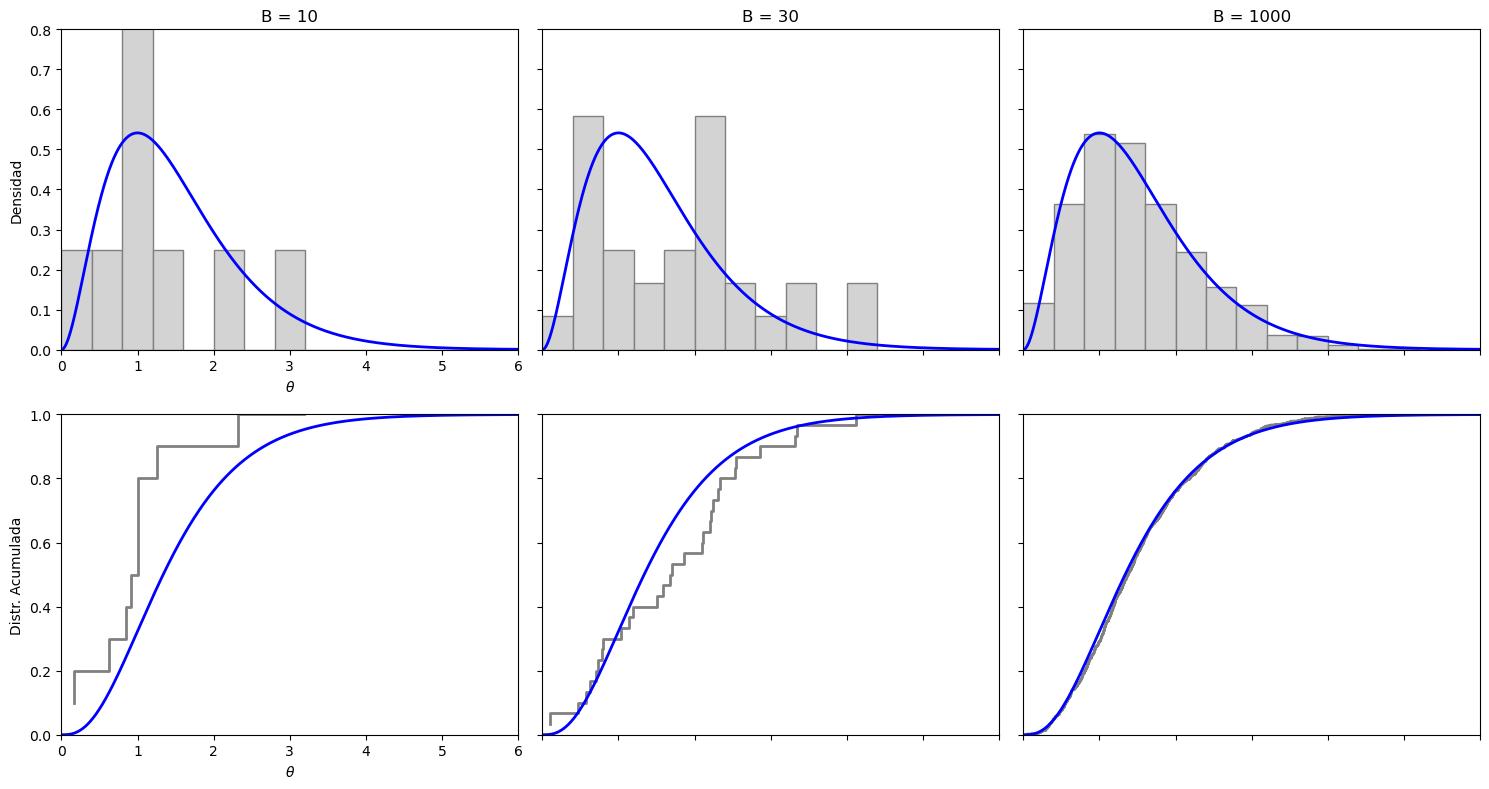

In [6]:
# Semilla para reproducibilidad
np.random.seed(123)

# Simulaciones
theta_mc = [gamma.rvs(a, scale=scale, size=size) for size in m]

# Configuración de gráficos: histogramas con densidad teórica
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for j, B in enumerate(m):
    # Histograma
    ax = axs[0, j]
    data = theta_mc[j]
    ax.hist(data, bins=15, density=True, range=(0, 6),
            color='lightgray', edgecolor='gray')
    x_vals = np.linspace(0, 6, 1000)
    ax.plot(x_vals, gamma.pdf(x_vals, a, scale=scale),
            color='blue', lw=2)
    ax.set_title(f"B = {B}")
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 0.8)
    if j == 0:
        ax.set_ylabel("Densidad")
        ax.set_xlabel(r"$\theta$")
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    # CDF
    ax = axs[1, j]
    data = np.sort(theta_mc[j])
    ecdf = np.arange(1, B + 1) / B
    ax.step(data, ecdf, color='gray', lw=2)
    ax.plot(x_vals, gamma.cdf(x_vals, a, scale=scale),
            color='blue', lw=2)
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 1)
    if j == 0:
        ax.set_ylabel("Distr. Acumulada")
        ax.set_xlabel(r"$\theta$")
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])

plt.tight_layout()
plt.show()

A partir de la muestra $\theta^{(1)},\ldots,\theta^{(1000)}\stackrel{\text{iid}}{\sim} \textsf{Gamma}(3,2)$ se obtiene que:

In [8]:
# Parámetros
a = 3
b = 2
scale = 1 / b

# Simulación Monte Carlo
np.random.seed(123)
theta_mc_3 = gamma.rvs(a, scale=scale, size=1000)

# Cálculos exactos
exact_mean = a / b
exact_var = a / b**2
exact_prob = gamma.cdf(1, a, scale=scale)
exact_q50 = gamma.ppf(0.5, a, scale=scale)

# Estimaciones Monte Carlo
mc_mean = np.mean(theta_mc_3)
mc_var = np.var(theta_mc_3, ddof=1)
mc_prob = np.mean(theta_mc_3 < 1)
mc_q50 = np.quantile(theta_mc_3, 0.5)

# Crear tabla
tab = pd.DataFrame({
    "Media":      [exact_mean, mc_mean],
    "Varianza":   [exact_var, mc_var],
    "P(θ < 1)":   [exact_prob, mc_prob],
    "Q50%":       [exact_q50, mc_q50]
}, index=["Exacto", "Monte Carlo"]).T

# Mostrar tabla
tab.round(3)

,Exacto,Monte Carlo
Media,1.500,1.521
Varianza,0.750,0.715
P(θ < 1),0.323,0.293
Q50%,1.337,1.378


## Errores estándar de Monte Carlo

Sea $\theta^{(1)},\dots,\theta^{(B)}$ una muestra aleatoria de la distribución posterior $\theta\mid\boldsymbol{y}$. Se define la media muestral y la desviación estándar muestral como
$$
\bar{\theta} = \frac{1}{B} \sum_{b=1}^{B} \theta^{(b)},  
\qquad  
s_\theta = \sqrt{\frac{1}{B-1} \sum_{b=1}^{B} (\theta^{(b)} - \bar{\theta})^2}.
$$

El **error estándar de Monte Carlo** de $\bar{\theta}$ es una aproximación de la desviación estándar de $\bar{\theta}$ y se calcula como  
$$
\frac{s_\theta}{\sqrt{B}}.
$$

El **coeficiente de variación de Monte Carlo**, que mide la variabilidad relativa de la estimación, se define como  
$$
\frac{s_\theta / \sqrt{B}}{|\bar{\theta}|}.
$$

Por el Teorema del Límite Central, el **margen de error de Monte Carlo** al $95\%$ de confianza para $\textsf{E}(\theta\mid\boldsymbol{y})$ es  
$$
1.96\, \frac{s_\theta}{\sqrt{B}}.
$$

Para determinar qué tan grande debe ser el **número de muestras** de Monte Carlo, se elige $B$ lo suficientemente grande para que el error estándar de Monte Carlo sea menor que un margen de error especificado, asegurando una estimación precisa de $\textsf{E}(\theta\mid\boldsymbol{y})$.

#### Ejemplo

Considere las muestras i.i.d. $\theta^{(1)},\dots,\theta^{(1000)}$ extradidas de la distribució $\textsf{Gamma}(3,2)$.

In [11]:
# Media
media_theta = np.mean(theta_mc_3)
print("Media:", round(media_theta, 3))

# Desviación estándar
desv_theta = np.std(theta_mc_3, ddof=1)
print("Desviación estándar:", round(desv_theta, 3))

# Error estándar
error_estandar = desv_theta / np.sqrt(len(theta_mc_3))
print("Error estándar:", round(error_estandar, 3))

# Coeficiente de variación del estimador
cv = error_estandar / abs(media_theta)
print("Coeficiente de variación:", round(cv, 3))

# Tamaño de muestra necesario para un margen de error de 0.01 con 95% de confianza
n_necesario = (1.96**2 * desv_theta**2) / 0.01**2
print("Tamaño de muestra necesario:", round(n_necesario))

Media: 1.521
Desviación estándar: 0.846
Error estándar: 0.027
Coeficiente de variación: 0.018
Tamaño de muestra necesario: 27480


# Inferencia sobre una función arbitraria

Los métodos de Monte Carlo facilitan la inferencia posterior sobre cualquier **función arbitraria** de $\theta$, denotada como $\gamma = g(\theta)$. El procedimiento consiste en:  

1. Simular una muestra $\theta^{(1)},\dots,\theta^{(B)} \overset{\text{iid}}{\sim} p(\theta\mid \boldsymbol{y})$.  
2. Evaluar $\gamma^{(b)} = g(\theta^{(b)})$ para cada $b=1,\dots,B$.  

La secuencia $\gamma^{(1)},\dots,\gamma^{(B)}$ forma una **muestra aleatoria** de la distribución posterior $p(\gamma\mid \boldsymbol{y})$, permitiendo realizar inferencia sobre $\gamma$ de la misma manera que sobre $\theta$.

# Bondad de ajuste

Los métodos de Monte Carlo permiten analizar la **distribución predictiva posterior** $p(y^*\mid\boldsymbol{y})$, lo que facilita la evaluación de la **bondad de ajuste interna del modelo** mediante **estadísticos de prueba** calculados a partir de esta distribución. 

El procedimiento es el siguiente:  
1. Simular $\theta^{(1)},\dots,\theta^{(B)} \overset{\text{iid}}{\sim} p(\theta\mid \boldsymbol{y})$.  
2. Para cada $b = 1,\dots,B$, generar datos predictivos  
   $$
   (y^*_1)^{(b)},\dots,(y^*_n)^{(b)} \overset{\text{iid}}{\sim} p(y\mid\theta^{(b)}).
   $$  
3. Calcular el estadístico de prueba $t^{(b)} = t((y^*_1)^{(b)},\dots,(y^*_n)^{(b)})$, donde $t(\cdot)$ mide la característica de interés en los datos simulados.  
4. Comparar la distribución de $t^{(1)},\dots,t^{(B)}$ con el **valor observado** $t_0 = t(y_1,\dots,y_n)$.  

Si $t_0$ es un **valor típico dentro de la distribución** de $t^{(1)},\dots,t^{(B)}$, se concluye que el modelo **captura adecuadamente la característica de interés** reflejada en el estadístico de prueba.  

Un modelo adecuado debe generar datos predictivos que reflejen las **características clave** del conjunto observado. Si no es así, puede requerirse un modelo más complejo.

## Valor $p$ predictivo posterior

El **valor $p$ predictivo posterior** es una medida utilizada para evaluar la **bondad de ajuste interna** de un modelo estadístico. 

Se basa en la comparación entre un **estadístico de prueba** calculado a partir de los datos observados y su distribución bajo la **distribución predictiva posterior** del modelo.

Formalmente, se define como:
$$
p_{\text{post}} = \textsf{Pr}(t(\boldsymbol{y}^*) \leq t(\boldsymbol{y}) \mid \boldsymbol{y}),
$$
donde la probabilidad se toma respecto a la distribución predictiva posterior de los datos replicados $ \boldsymbol{y}^* $.

- Si $p_{\text{post}}$ es **cercano a 0 o 1**, indica que el modelo **no reproduce bien los datos observados**, ya que los valores simulados de $t(\boldsymbol{y}^*)$ son sistemáticamente menores o mayores que el valor observado $t(\boldsymbol{y})$.
- Si $p_{\text{post}}$ es **cercano a 0.5**, sugiere que el modelo **ajusta adecuadamente los datos**, ya que las simulaciones generan valores de $t(\boldsymbol{y}^*)$ similares a $t(\boldsymbol{y})$, lo que indica coherencia entre el modelo y los datos observados.


# Ejemplo: Número de hijos y educación

**Censo Nacional de Población y Vivienda - CNPV - 2018** está disponible en este [enlace](https://microdatos.dane.gov.co/index.php/catalog/643/study-description). 

Diccionario de datos (`ddi-documentation-spanish-643.pdf`) está disponible en este [enlace](https://microdatos.dane.gov.co/index.php/catalog/643/datafile/F11).

La base de datos contiene la información de una **muestra aleatoria simple de personas** que residen en hogares particulares o personas que residen en lugares especiales de alojamiento con las características correspondientes al censo.

Modelar el número de hijos de personas con las siguientes características: mujer, jefa de hogar, entre 40 y 44 años, alfabetizada, nacida en Colombia, residente en Colombia hace cinco años, sin pertenencia a ningún grupo étnico y que reporta si tiene hijos o no.

¿Existen diferencias significativas en el **número de hijos** entre dos mujeres seleccionadas al azar, de entre 40 y 44 años, una con educación superior y otra sin educación superior?

## Tratamiento de datos

Se consideran personas identificadas como: mujer, jefe de hogar, 40 a 44 años, alfabeta, lugar de nacimiento en Colombia, lugar de residencia hace 5 años en Colombia, ningún grupo étnico, informa si tiene hijos o no.

In [14]:
# Datos
df = pd.read_csv("CNPV2018.txt")

# Dimensiones
print(df.shape)

(71814, 48)


In [15]:
# Recodificación del nivel educativo
# 0: Sin educación superior (preescolar a técnico)
# 1: Con educación superior (universitario o posgrado)
df['P_NIVEL_ANOSR'] = np.where(df['P_NIVEL_ANOSR'].isin([8, 9]), 1, 0).astype(int)

In [16]:
# Frecuencias: indicadora de educación superior
# PA1_THNV: Hijos(as) nacidos vivos
df['P_NIVEL_ANOSR'].value_counts().sort_index()

P_NIVEL_ANOSR
0    55569
1    16245
Name: count, dtype: int64

In [17]:
# Recodificación: sin hijos (NA → 0)
df['PA1_THNV'] = (
    pd.to_numeric(df['PA1_THNV'], errors='coerce')  # ensure numeric, set non-numeric to NaN
      .fillna(0)                                    # replace NaN with 0
      .astype(int)                                  # make sure the column is integer
)

In [18]:
# Frecuencias: número de hijos
df['PA1_THNV'].value_counts().sort_index()

PA1_THNV
0     51390
1      6091
2      7009
3      3984
4      1719
5       709
6       363
7       200
8       128
9        82
10       45
11       18
12       24
13       16
14        5
15        8
18        1
99       22
Name: count, dtype: int64

In [19]:
# Remover datos faltantes codificados como 99
df = df[(df['P_NIVEL_ANOSR'] != 99) & (df['PA1_THNV'] != 99)]

In [20]:
# Definir filtro de selección
filtro = (
    (df['P_PARENTESCOR'] == 1) &
    (df['P_SEXO'] == 2) &
    (df['P_EDADR'] == 9) &
    (df['PA1_GRP_ETNIC'] == 6) &
    (df['PA_LUG_NAC'].isin([2, 3])) &
    (df['PA_VIVIA_5ANOS'].isin([2, 3])) &
    (df['PA_HNV'].isin([1, 2])) &
    (df['P_ALFABETA'] == 1)
)

# Filtrar datos y extraer número de hijos según nivel educativo
y1 = df.loc[filtro & (df['P_NIVEL_ANOSR'] == 0), 'PA1_THNV'].astype(int).values  # Sin educación superior
y2 = df.loc[filtro & (df['P_NIVEL_ANOSR'] == 1), 'PA1_THNV'].astype(int).values  # Con educación superior

In [21]:
# Tamaños de muestra
n1 = len(y1)
print(n1)

n2 = len(y2)
print(n2)

# Estadísticos suficientes
s1 = y1.sum()
print(s1)

s2 = y2.sum()
print(s2)

360
110
762
127


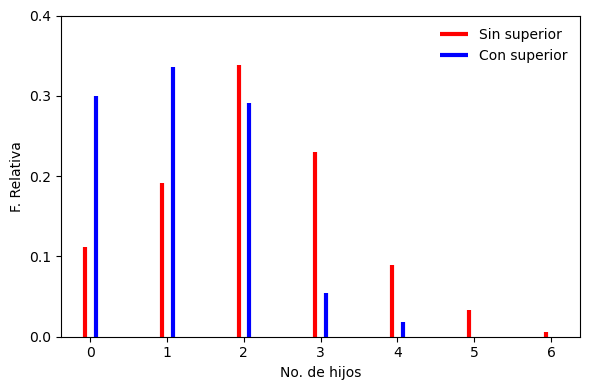

In [22]:
# Distribución de frecuencias
y = np.arange(0, 7)

# Frecuencias relativas
freq_y1 = np.array([np.sum(y1 == i) for i in y]) / n1
freq_y2 = np.array([np.sum(y2 == i) for i in y]) / n2

# Configuración del gráfico
plt.figure(figsize=(6, 4))
plt.ylim(0, 0.4)

# Gráfico de barras tipo "h" (líneas verticales)
plt.vlines(y - 0.07, 0, freq_y1, colors='red', linewidth=3, label='Sin superior')
plt.vlines(y + 0.07, 0, freq_y2, colors='blue', linewidth=3, label='Con superior')

# Etiquetas y leyenda
plt.xlabel("No. de hijos")
plt.ylabel("F. Relativa")
plt.legend(loc='upper right', frameon=False)
plt.xticks(y)
plt.yticks(np.linspace(0, 0.4, 5))
plt.tight_layout()
plt.show()

## Distribución posterior

In [24]:
# Previa Gamma(2,1)
a = 2
b = 1

# Media previa de theta
print(round(a / b, 3))

# CV previo de theta
cv = np.sqrt(a / b**2) / (a / b)
print(round(cv, 3))

# Parámetros de la distribución posterior de theta
ap1 = a + s1
bp1 = b + n1
ap2 = a + s2
bp2 = b + n2

2.0
0.707


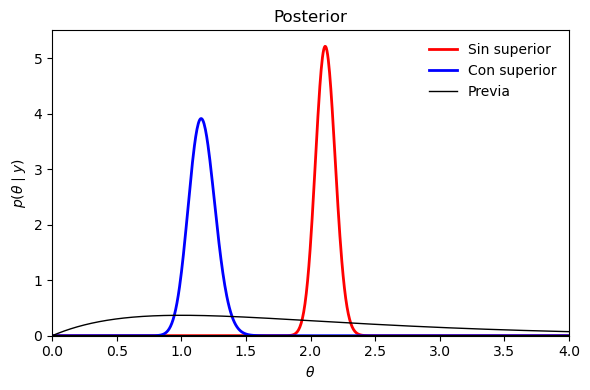

In [25]:
# Configuración del gráfico
theta = np.linspace(0, 5, 1000)

# Distribución posterior
plt.figure(figsize=(6, 4))
plt.xlim(0, 4)
plt.ylim(0, 5.5)

# Etiquetas y título
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta \mid y)$')
plt.title("Posterior")

# Densidades: posterior sin/con educación superior y previa
plt.plot(theta, gamma.pdf(theta, a=ap1, scale=1/bp1), color='red', linewidth=2, label="Sin superior")
plt.plot(theta, gamma.pdf(theta, a=ap2, scale=1/bp2), color='blue', linewidth=2, label="Con superior")
plt.plot(theta, gamma.pdf(theta, a=a, scale=1/b), color='black', linewidth=1, label="Previa")

# Línea base
plt.axhline(0, color='black')

# Leyenda
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.show()

## Distribución predictiva posterior

In [27]:
# Número de muestras
B = 10000

# Muestras de la distribución posterior de theta
np.random.seed(123)
th1_mc = np.random.gamma(shape=ap1, scale=1/bp1, size=B)
th2_mc = np.random.gamma(shape=ap2, scale=1/bp2, size=B)

# Muestras de la distribución predictiva posterior
np.random.seed(123)
y1_mc = np.random.poisson(lam=th1_mc)
y2_mc = np.random.poisson(lam=th2_mc)

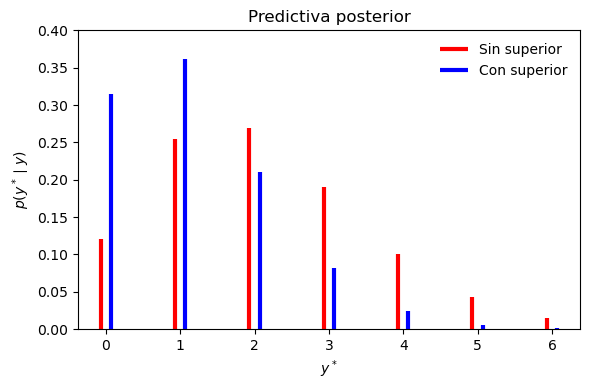

In [28]:
# Soporte de y
y = np.arange(0, 7)

# Parámetros de la binomial negativa: n = size, p = size / (size + mu)
mu1 = ap1 / bp1
mu2 = ap2 / bp2

# Calculamos las probabilidades con la parametrización de scipy
# p = size / (size + mu), size = ap
prob1 = nbinom.pmf(y, n=ap1, p=ap1 / (ap1 + mu1))
prob2 = nbinom.pmf(y, n=ap2, p=ap2 / (ap2 + mu2))

# Configuración del gráfico
plt.figure(figsize=(6, 4))
plt.vlines(y - 0.07, 0, prob1, colors='red', linewidth=3, label='Sin superior')
plt.vlines(y + 0.07, 0, prob2, colors='blue', linewidth=3, label='Con superior')

plt.ylim(0, 0.4)
plt.xlabel(r"$y^*$")
plt.ylabel(r"$p(y^* \mid y)$")
plt.title("Predictiva posterior")
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.show()

In [29]:
# Distribución exacta para mujeres sin pregrado
mu1 = (a + s1) / (b + n1)
size1 = a + s1
p1 = size1 / (size1 + mu1)
prob_exact_sin = nbinom.pmf(y, n=size1, p=p1)

# Distribución aproximada con muestras de Monte Carlo
prob_aprox_sin = np.array([(y1_mc == k).mean() for k in y])

# Tabla para mujeres sin pregrado
tab_sin = pd.DataFrame([prob_exact_sin, prob_aprox_sin],
                       index=["Exacta", "Aproximada"],
                       columns=y).T.round(3)

print("Distribución predictiva para mujeres sin pregrado:")
print(tabulate(tab_sin, headers="keys", tablefmt="github", stralign="center", numalign="center"))

# Distribución exacta para mujeres con pregrado
mu2 = (a + s2) / (b + n2)
size2 = a + s2
p2 = size2 / (size2 + mu2)
prob_exact_con = nbinom.pmf(y, n=size2, p=p2)

# Distribución aproximada con muestras de Monte Carlo
prob_aprox_con = np.array([(y2_mc == k).mean() for k in y])

# Tabla para mujeres con pregrado
tab_con = pd.DataFrame([prob_exact_con, prob_aprox_con],
                       index=["Exacta", "Aproximada"],
                       columns=y).T.round(3)

print("\nDistribución predictiva para mujeres con pregrado:")
print(tabulate(tab_con, headers="keys", tablefmt="github", stralign="center", numalign="center"))

# Intervalo de credibilidad al 95% para la diferencia
diff_y = y1_mc - y2_mc
ic_95 = np.quantile(diff_y, [0.025, 0.975]).round(3)
print("\nIntervalo de credibilidad al 95% para y*_1 - y*_2:", ic_95)

# Probabilidad posterior de que y*_1 - y*_2 > 0
prob_pos = np.mean(diff_y > 0).round(3)
print("Probabilidad posterior de que y*_1 - y*_2 > 0:", prob_pos)


Distribución predictiva para mujeres sin pregrado:
|    |  Exacta  |  Aproximada  |
|----|----------|--------------|
| 0  |  0.121   |    0.119     |
| 1  |  0.255   |    0.256     |
| 2  |  0.269   |    0.269     |
| 3  |   0.19   |    0.192     |
| 4  |  0.101   |    0.101     |
| 5  |  0.043   |    0.041     |
| 6  |  0.015   |    0.016     |

Distribución predictiva para mujeres con pregrado:
|    |  Exacta  |  Aproximada  |
|----|----------|--------------|
| 0  |  0.314   |    0.313     |
| 1  |  0.362   |     0.36     |
| 2  |   0.21   |    0.213     |
| 3  |  0.082   |    0.081     |
| 4  |  0.024   |    0.025     |
| 5  |  0.006   |    0.007     |
| 6  |  0.001   |    0.001     |

Intervalo de credibilidad al 95% para y*_1 - y*_2: [-2.  5.]
Probabilidad posterior de que y*_1 - y*_2 > 0: 0.591


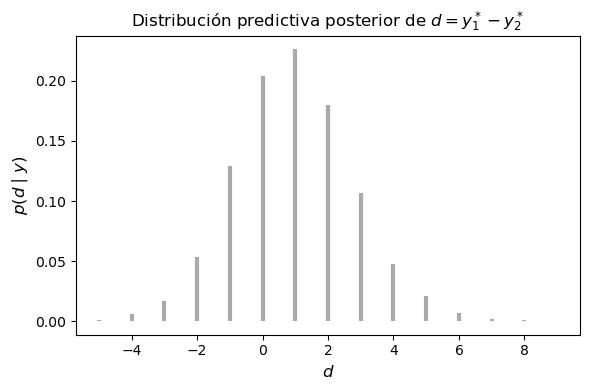

In [30]:
# Calcular la distribución de d = y1_mc - y2_mc
d_diff = y1_mc - y2_mc
counts = Counter(d_diff)
d_vals = np.array(sorted(counts.keys()))
d_probs = np.array([counts[k] / B for k in d_vals])

# Graficar la distribución
plt.figure(figsize=(6, 4))
plt.vlines(d_vals, 0, d_probs, colors="darkgrey", linewidth=3)
plt.xlabel(r"$d$", fontsize=12)
plt.ylabel(r"$p(d \mid y)$", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Distribución predictiva posterior de $d = y^*_1 - y^*_2$", fontsize=12)
plt.tight_layout()
plt.show()

La diferencia entre hacer inferencia sobre $\theta_1 - \theta_2$ y $y_1^* - y_2^*$ radica en el nivel de incertidumbre considerado y en la cantidad de información utilizada en cada caso:  

- La inferencia sobre $\theta_1 - \theta_2$ se basa en la distribución posterior de los parámetros, reflejando únicamente la incertidumbre en su estimación a partir de los datos observados y la estructura del modelo.

- La inferencia sobre $y_1^* - y_2^*$ incorpora tanto la incertidumbre en \(\theta_1\) y \(\theta_2\) como la variabilidad inherente a los datos generados a partir de estas distribuciones, proporcionando una caracterización sobre posibles diferencias en observaciones futuras.

## Chequeo del modelo

In [33]:
# Estadísticos observados
t_obs_1 = [np.mean(y1), np.std(y1, ddof=1)]
t_obs_2 = [np.mean(y2), np.std(y2, ddof=1)]
print("t_obs_1:", np.round(t_obs_1, 3))
print("t_obs_2:", np.round(t_obs_2, 3))

# Número de muestras
B = 10000
np.random.seed(123)

# Muestras de la distribución posterior de theta
th1_mc = np.random.gamma(shape=ap1, scale=1/bp1, size=B)
th2_mc = np.random.gamma(shape=ap2, scale=1/bp2, size=B)

# Inicializar matrices para almacenar estadísticas de prueba
t_mc_1 = np.empty((B, 2))
t_mc_2 = np.empty((B, 2))

# Distribución predictiva posterior
for i in range(B):
    # Datos simulados
    y1_rep = np.random.poisson(lam=th1_mc[i], size=n1)
    y2_rep = np.random.poisson(lam=th2_mc[i], size=n2)

    # Estadísticos de prueba
    t_mc_1[i, :] = [np.mean(y1_rep), np.std(y1_rep, ddof=1)]
    t_mc_2[i, :] = [np.mean(y2_rep), np.std(y2_rep, ddof=1)]

t_obs_1: [2.117 1.266]
t_obs_2: [1.155 0.979]


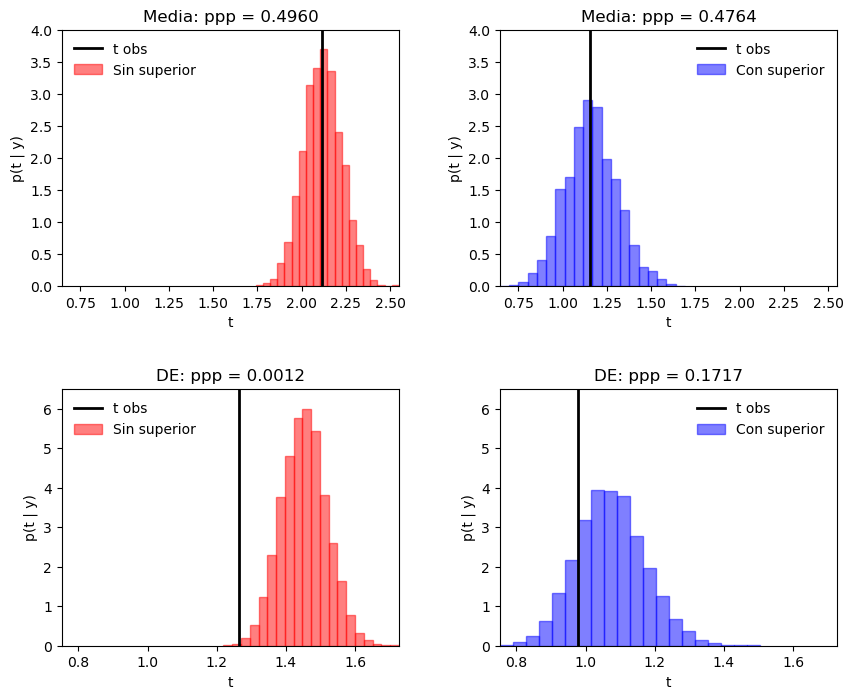

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración del gráfico: 2 filas x 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Colores semitransparentes
col1 = (1, 0, 0, 0.5)  # rojo con alpha
col2 = (0, 0, 1, 0.5)  # azul con alpha

# Límites de los ejes
xlim_media = [min(t_mc_1[:, 0].min(), t_mc_2[:, 0].min()), max(t_mc_1[:, 0].max(), t_mc_2[:, 0].max())]
ylim_media = [0, 4]

xlim_de = [min(t_mc_1[:, 1].min(), t_mc_2[:, 1].min()), max(t_mc_1[:, 1].max(), t_mc_2[:, 1].max())]
ylim_de = [0, 6.5]

# Histograma de la media - Grupo sin educación superior
axs[0, 0].hist(t_mc_1[:, 0], bins=20, density=True, color=col1, edgecolor=col1)
axs[0, 0].axvline(t_obs_1[0], color='black', linewidth=2, linestyle='-')
axs[0, 0].set_xlim(xlim_media)
axs[0, 0].set_ylim(ylim_media)
axs[0, 0].set_title(f"Media: ppp = {np.mean(t_mc_1[:, 0] < t_obs_1[0]):.4f}")
axs[0, 0].set_xlabel("t")
axs[0, 0].set_ylabel("p(t | y)")

# Leyenda
axs[0, 0].legend(["t obs", "Sin superior"], loc="upper left", frameon=False)

# Histograma de la media - Grupo con educación superior
axs[0, 1].hist(t_mc_2[:, 0], bins=20, density=True, color=col2, edgecolor=col2)
axs[0, 1].axvline(t_obs_2[0], color='black', linewidth=2, linestyle='-')
axs[0, 1].set_xlim(xlim_media)
axs[0, 1].set_ylim(ylim_media)
axs[0, 1].set_title(f"Media: ppp = {np.mean(t_mc_2[:, 0] < t_obs_2[0]):.4f}")
axs[0, 1].set_xlabel("t")
axs[0, 1].set_ylabel("p(t | y)")
axs[0, 1].legend(["t obs", "Con superior"], loc="upper right", frameon=False)

# Histograma de la DE - Grupo sin educación superior
axs[1, 0].hist(t_mc_1[:, 1], bins=20, density=True, color=col1, edgecolor=col1)
axs[1, 0].axvline(t_obs_1[1], color='black', linewidth=2, linestyle='-')
axs[1, 0].set_xlim(xlim_de)
axs[1, 0].set_ylim(ylim_de)
axs[1, 0].set_title(f"DE: ppp = {np.mean(t_mc_1[:, 1] < t_obs_1[1]):.4f}")
axs[1, 0].set_xlabel("t")
axs[1, 0].set_ylabel("p(t | y)")
axs[1, 0].legend(["t obs", "Sin superior"], loc="upper left", frameon=False)

# Histograma de la DE - Grupo con educación superior
axs[1, 1].hist(t_mc_2[:, 1], bins=20, density=True, color=col2, edgecolor=col2)
axs[1, 1].axvline(t_obs_2[1], color='black', linewidth=2, linestyle='-')
axs[1, 1].set_xlim(xlim_de)
axs[1, 1].set_ylim(ylim_de)
axs[1, 1].set_title(f"DE: ppp = {np.mean(t_mc_2[:, 1] < t_obs_2[1]):.4f}")
axs[1, 1].set_xlabel("t")
axs[1, 1].set_ylabel("p(t | y)")
axs[1, 1].legend(["t obs", "Con superior"], loc="upper right", frameon=False)

plt.show()

# Ejercicios

- Suponga que, en un problema de respuesta binaria, se desea utilizar una distribución previa uniforme para la proporción de la población $\theta$, con el objetivo de no favorecer ningún valor particular de $\theta$ a priori. Sin embargo, algunos investigadores prefieren analizar las proporciones en la escala logit, es decir, consideran el parámetro transformado $\gamma = \log \frac{\theta}{1-\theta}$. Mediante simulación de Monte Carlo, determine la distribución previa de $\gamma$ inducida por la distribución uniforme de $\theta$. ¿La distribución resultante es uniforme en $\gamma$?

- Un laboratorio de investigación en cáncer estudia la tasa de tumorogénesis en dos cepas de ratones, A y B. Se han registrado los recuentos de tumores en 10 ratones de la cepa A y 13 de la cepa B. Los ratones de tipo A han sido ampliamente investigados, y estudios previos indican que sus recuentos de tumores siguen aproximadamente una distribución de Poisson con media 12. En contraste, la tasa de tumorogénesis en los ratones de tipo B es desconocida, aunque esta cepa está relacionada con la cepa A. Los recuentos de tumores observados en cada grupo son:
$$
\boldsymbol{y}_A = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6),\quad
\boldsymbol{y}_B = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).
$$

     a. Asumiendo modelos independientes Gamma-Poisson para cada grupo, con distribuciones previas $\theta_A \sim \textsf{Gamma}(120,10)$ y $\theta_B \sim \textsf{Gamma}(12,1)$, calcule $\textsf{Pr}(\theta_B < \theta_A \mid \boldsymbol{y}_A, \boldsymbol{y}_B)$.  
     b. Para cada $m \in \{1,2,\dots,50\}$, calcule nuevamente $\textsf{Pr}(\theta_B < \theta_A \mid \boldsymbol{y}_A, \boldsymbol{y}_B)$, usando $\theta_A \sim \textsf{Gamma}(120,10)$ y $\theta_B \sim \textsf{Gamma}(12m, m)$. Evalúe la sensibilidad de la inferencia sobre el evento $\theta_B < \theta_A$ con respecto a la distribución previa de $\theta_B$.  
     c. Repita los numerales a. y b., pero en lugar del evento $\theta_B < \theta_A$, evalúe $\bar{y^*}_B < \bar{y^*}_A$, donde $\bar{y^*}_A$ y $\bar{y^*}_B$ son promedios muestrales obtenidos a partir de muestras i.i.d. de tamaños 10 y 13, respectivamente, generadas de la distribución predictiva posterior de A y B.  
     d. Usando las distribuciones previas de la parte a. para ambas cepas, evalúe la bondad de ajuste del modelo empleando como estadísticos de prueba la media y la desviación estándar.

- Suponga que $y_1,\dots,y_5$ son observaciones condicionalmente independientes de una distribución Cauchy con parámetro de localización $\theta$ y parámetro de escala 1, es decir,  
$$
p(y_i\mid\theta) = \frac{1}{\pi(1+(y_i-\theta)^2)}, \qquad -\infty<y_i<\infty, \qquad -\infty<\theta<\infty,
$$  
para $i=1,\dots,5$. Además, suponga que la distribución previa de $\theta$ es Uniforme en el intervalo $(0,100)$, es decir, $\theta\sim\textsf{U}(0,100)$. Dado el vector de observaciones $\boldsymbol{y}=(43.0, 44.0, 45.0, 46.5, 47.5)$, realice lo siguiente:  

     a. Evalúe la función de densidad posterior sin normalizar, $p(\boldsymbol{y}\mid\theta)\,p(\theta)$, en una grilla de valores equidistantes para $\theta$ de la forma $0,\frac{1}{M},\frac{2}{M},\dots,100$, con $M=1,000$. A partir de estos valores, calcule y grafique la función de densidad posterior normalizada, $p(\theta\mid\boldsymbol{y})$.  
     b. Utilizando la aproximación discreta obtenida en el numeral anterior, genere $B=10,000$ muestras de la distribución posterior de $\theta$ y grafique el histograma correspondiente, incluyendo una estimación puntual y un intervalo de credibilidad al 95%.  
     c. A partir de las muestras de la distribución posterior de $\theta$ obtenidas en el numeral anterior, genere muestras de la distribución predictiva posterior de una observación futura y grafique el histograma correspondiente, incluyendo una estimación puntual y un intervalo de credibilidad al 95%.  

# Referencias

Hoff, P. D. (2009). ***A First Course in Bayesian Statistical Methods***. Springer New York.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). ***Bayesian Data Analysis*** (3rd ed.). Chapman & Hall/CRC.